# Linear Regression from scratch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt

In [ ]:
import pandas as pd
import seaborn as sns

## Loading data from data.csv file


In [ ]:

def load_data(file_name):
    df = pd.read_csv(file_name)
    X = df.iloc[:,0]
    y = df.iloc[:,-1]
    return X, y

In [ ]:
[X,y] = load_data("data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [ ]:
y.head(10)

,y
0,9.351909
1,5.080108
2,7.434984
3,8.391216
4,10.046228
5,10.202563
6,10.233308
7,6.386448
8,8.172254
9,6.994878


# Visualising the data


In [ ]:
def vis_data(X,y):
    print("X.head()")
    print(X.head())
    print('#'*150)
    print("X.tail()")
    print(X.tail())
    print('#'*150)
    print("X.describe()")
    print(X.describe())
    print('#'*150)
    print("X.info")
    print(X.info)
    print('#'*150)
    print("Null Values: ", X.isnull().sum())
    print('#'*150)
    sns.histplot(X).set_title('X')
    plt.show()
    print('#'*150)
    sns.histplot(y).set_title('y')
    plt.show()
    print('#'*150)
    plt.scatter(X,y)
    plt.xlabel('X')
    plt.ylabel('y(target)')
    plt.title('Input Data')
    plt.show()
    print('#'*150)
    print("Outlier Check:")
    fig, ax = plt.subplots(1, 2)
    ax[0] = sns.boxplot(x = X, ax = ax[0])
    ax[1] = sns.boxplot(x = y, ax = ax[1])
    plt.show()
    print('#'*150)
    sns.heatmap(pd.DataFrame(np.correlate(X,y))).set_title('Correlation')
    plt.show()

    return

X.head()
0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
Name: X, dtype: float64
######################################################################################################################################################
X.tail()
995    0.091582
996    0.917314
997    0.136819
998    0.950237
999    0.446006
Name: X, dtype: float64
######################################################################################################################################################
X.describe()
count    1000.000000
mean        0.490257
std         0.292137
min         0.004632
25%         0.235973
50%         0.496807
75%         0.744320
max         0.999718
Name: X, dtype: float64
######################################################################################################################################################
X.info
<bound method Series.info of 0      0.374540
1      0.950714
2      0.731994
3      0.598658
4      0.156019
         .

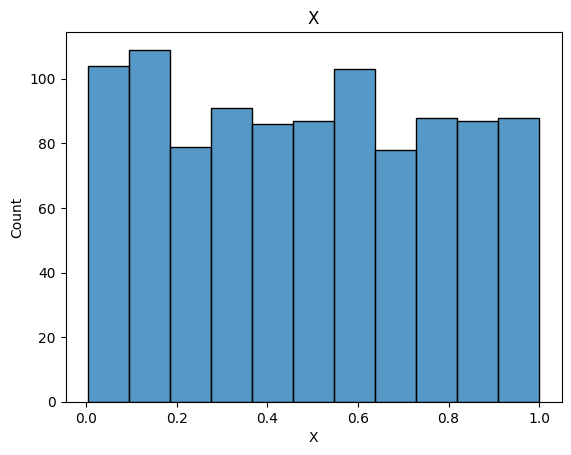

######################################################################################################################################################


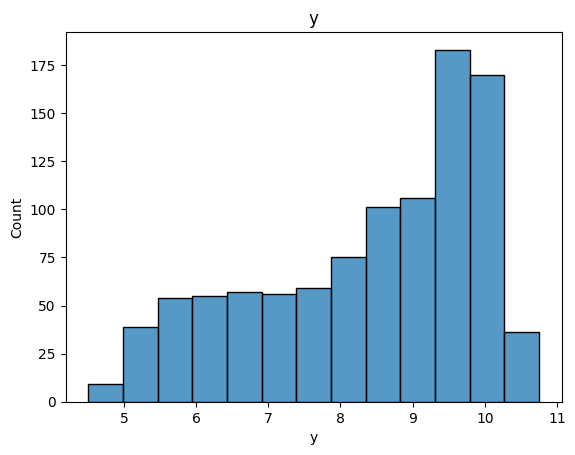

######################################################################################################################################################


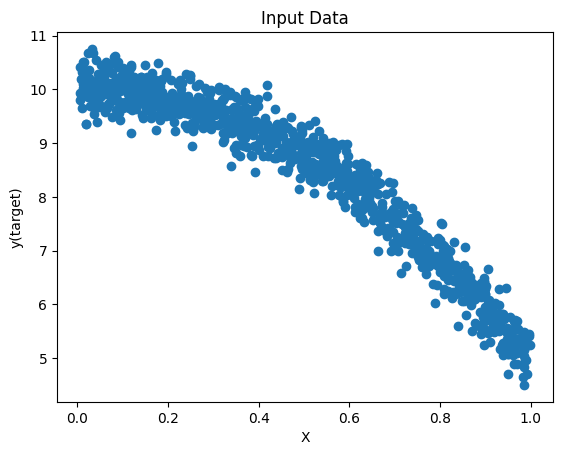

######################################################################################################################################################
Outlier Check:


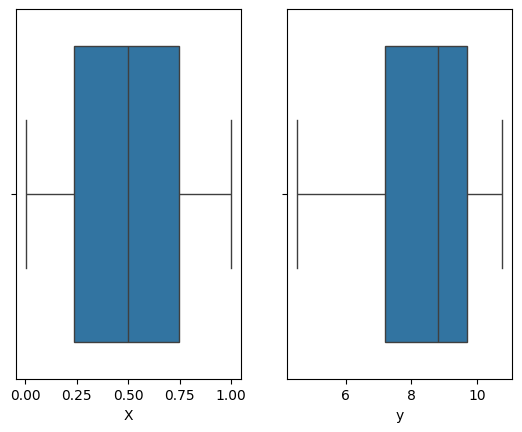

######################################################################################################################################################


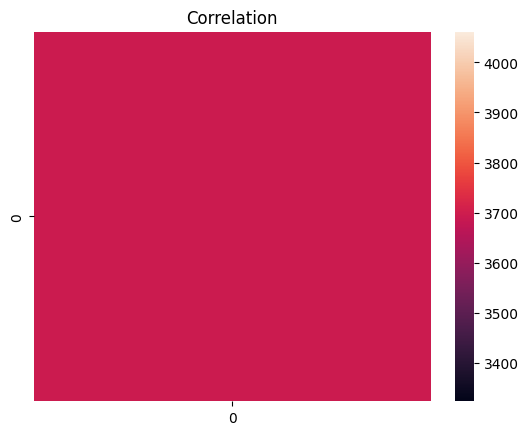

In [ ]:
vis_data(X,y)

## Loss calculation
Complete the function 'loss'. This function calculates an appropriate loss when given the predicted and true values of 'y' (the variable being predicted).

In [ ]:
# y_true --> the target values.
# y_pred --> the predicted values
def loss(y_true, y_pred):
    #Calculating loss.
    loss_ = np.mean(np.square(y_true - y_pred))
    return loss_

### Testing the loss function

In [ ]:
loss(np.array([5, 2]), np.array([10, 3]))

13.0

## Calculating Gradients
Complete the 'gradients' function. This function calculates the partial derivatives of linear regression. One for the weights (dw) and one for the bias term/constant term (db).

In [ ]:
#Input:
# X --> Input.
# y_true --> target values.
# y_pred --> predictions.
#return:
# dw --> the gradient with respect to the weights
# db --> the gradient with respect to the bias.
def gradients(X, y_true, y_pred):
    dw = np.mean(-2 * X * (y_true - y_pred))
    db = np.mean(-2 * (y_true - y_pred))

    return dw, db

### Testing gradients function

In [ ]:
dw,db = gradients(np.array([5]),np.array([1.5]),np.array([1.1]))
print(f'dw = {dw} , db = {db}')

dw = -3.999999999999999 , db = -0.7999999999999998


## Training
Returns the weights and bias term for a linear regression model.

In [ ]:
# X --> Input.
# y --> true/target value.
# w --> weights
# b --> bias
# add more arguments as you need
def train(X, y, lr_, epochs):
    w = 0
    b = 0
    loss_values = []

    for i in range(epochs):
      # Predicted 'y' value calculation
      y_pred = w * X + b
      # Computing loss and adding it to our list
      loss_values.append(loss(y, y_pred))
      # Getting weight and bias gradient from our Gradients method, defined above
      loss_w, loss_b = gradients(X, y, y_pred)
      # Updating weight and bias
      w = w - (lr_ * loss_w)
      b = b - (lr_ * loss_b)

    # returning weights, bias and losses(List).
    return w, b, loss_values

Testing the function on the provided data.

In [ ]:
lr_ = 0.01 # Learning Rate
epochs = 3000 # Epochs

w, b, loss_ = train(X, y, lr_, epochs)
print(w)
print(b)
print(loss_[0],loss_[-1])

-4.862250546243251
10.780256090041727
72.95871157185934 0.23705768177694175


### Observations
Learning Rate for training the algorithm has been set as **0.01**
and epochs have been set to **3000**.

The results of the model training are as follows:



*   **weight/coefficient**: **-4.862250546243251**
*   **bias/intercept**: **10.780256090041727**
*   Initially **loss** was near about **72.95** but over the period of training it converged to **0.23**.


## Prediction
Complete the 'predict' function. This function provides a prediction of the target variable given input variables and appropriately determined weights and biases.

In [ ]:
def predict(X, w, b):
    model_prediction = w * X + b
    # Returning predictions.
    return model_prediction

### Visualising the predictions
The code below produces a visualisation of the real data and the model prediction.

Text(0.5, 1.0, 'Regression')

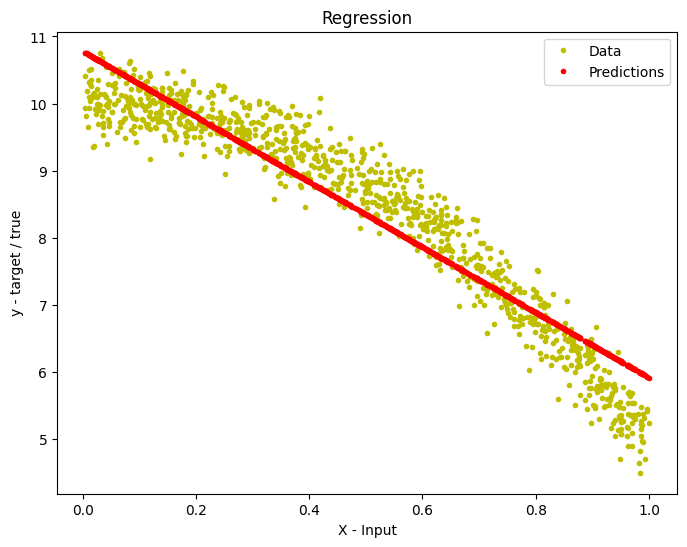

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.plot(X, y, 'y.')
plt.plot(X, predict(X, w, b), 'r.')
plt.legend(["Data", "Predictions"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Regression')

### Calculating the fit score

In [ ]:
from sklearn.metrics import r2_score
y_true = y
y_pred = predict(X, w, b)
r2_score(y_true, y_pred)

0.9000429103207654

## Using the scikit-learn module's linear regression implementation for creating the model

In [ ]:
[X,y] = load_data("data-2.csv")

In [ ]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [ ]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
X,1000.0,0.490257,0.292137,0.004632,0.235973,0.496807,0.74432,0.999718


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB


In [ ]:
X.isna().sum()

,0
X,0


In [ ]:
X.shape

(1000, 1)

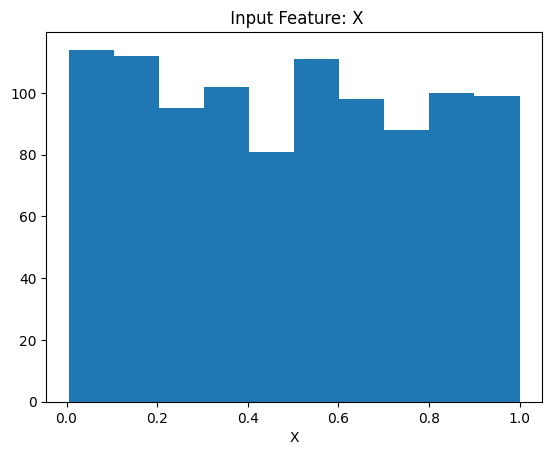

In [ ]:
plt.hist(X)
plt.xlabel('X')
plt.title(' Input Feature: X')
plt.show()

In [ ]:
y.shape

(1000, 1)

In [ ]:
y.isna().sum()

,0
y,0


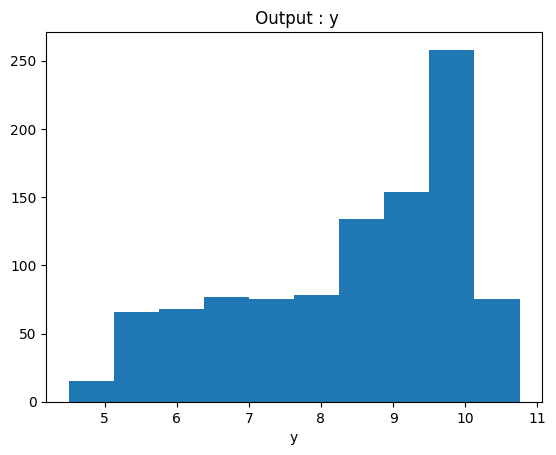

In [ ]:
plt.hist(y)
plt.xlabel('y')
plt.title(' Output : y')
plt.show()

In [ ]:
# Importing the required modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Splitting the input data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Creating the Linear Regression Object
lr_model = LinearRegression()
# Training the model on the training set
lr_model.fit(X_train, y_train)
# Generating predictions from the model on the test set
y_pred = lr_model.predict(X_test)

# Evaluating the model performance by computing R2 score
r2 = r2_score(y_test, y_pred)
print(r2)

0.9084911526515917


In [ ]:
lr_model.coef_

array([[-4.98632903]])

In [ ]:
lr_model.intercept_

array([10.84970103])

In [ ]:
# Calculating Adjusted R2 Score (To check for model Overfitting)
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print(adj_r2)

0.976578112511285


Text(0.5, 1.0, 'Regression')

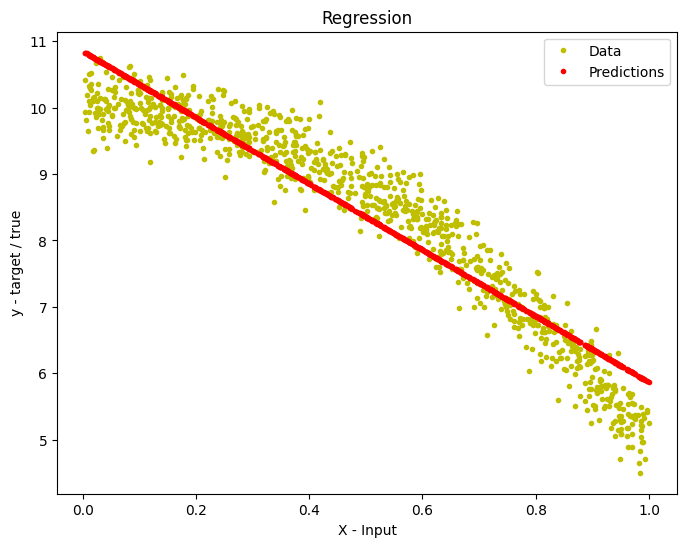

In [ ]:
# Plotting the Best Fit Line / Predicted Values for the Input Data(X)
y_pred_all = lr_model.predict(X)

fig = plt.figure(figsize=(8,6))
plt.plot(X, y, 'y.')
plt.plot(X, y_pred_all, 'r.')
plt.legend(["Data", "Predictions"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Regression')

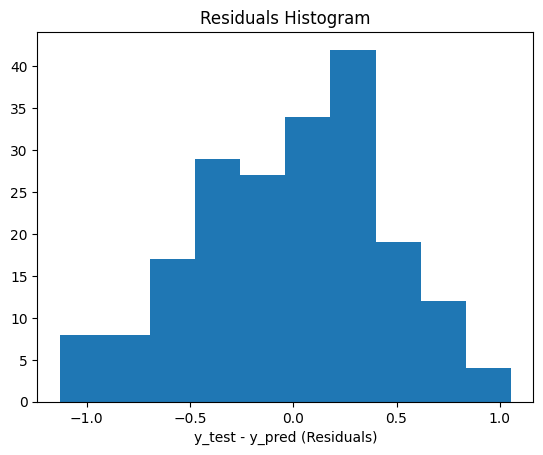

In [ ]:
# Plotting histogram of Residuals
plt.hist(y_test - y_pred)
plt.xlabel('y_test - y_pred (Residuals)')
plt.title('Residuals Histogram')
plt.show()

Above plot indicates that the residuals are more or less normally distributed (and aren't skewed towards any one side).

Text(0.5, 1.0, 'Residuals Vs Pedicted Values')

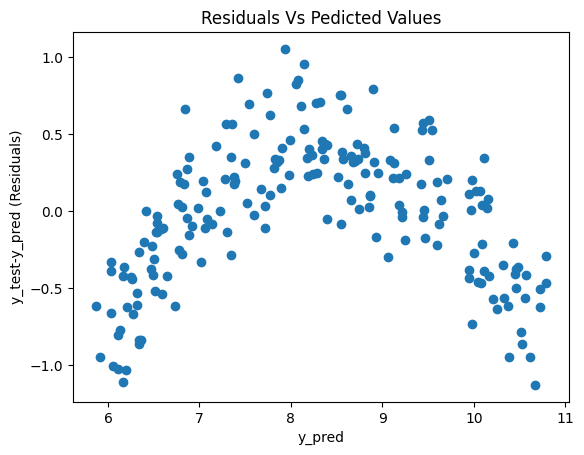

In [ ]:
# Residuals Vs Pedicted Values Plot
plt.scatter(y_pred, y_test-y_pred)
plt.xlabel('y_pred')
plt.ylabel('y_test-y_pred (Residuals)')
plt.title('Residuals Vs Pedicted Values')

**The above plot (Residuals Vs Pedicted Values) shows a parabolic pattern, implying that there is non-linearity in the given data set.**

Text(0.5, 1.0, 'y_test Vs y_pred')

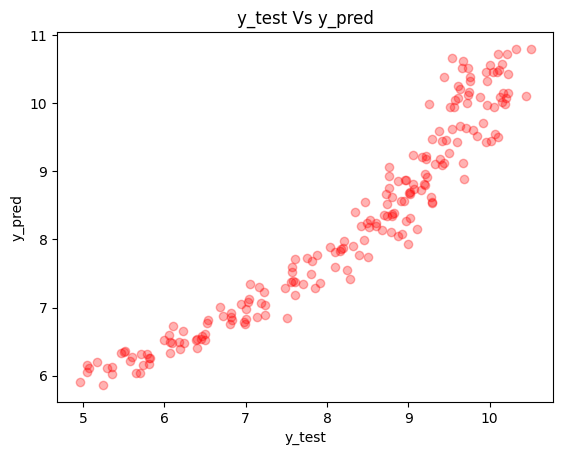

In [ ]:
# Actual Values of 'y' Vs Predicted values of 'y'
plt.scatter(y_test, y_pred, alpha = 0.3, c = 'red')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_test Vs y_pred')

## **Polynomial** **Regression**

Since the input data is non-linear





In [ ]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_ = PolynomialFeatures(degree = 3)
X_poly = polynomial_.fit_transform(X)
y_poly = polynomial_.fit_transform(y)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size = 0.2, random_state = 0)

lr_model_poly = LinearRegression()
lr_model_poly.fit(X_train_poly, y_train_poly)
y_pred_poly = lr_model_poly.predict(X_test_poly)
r2 = r2_score(y_test_poly, y_pred_poly)
print(r2)

0.9710395243703347


In [ ]:
# Calculating Adjusted R2 Score (To check for model Overfitting)
n = X_test_poly.shape[0]
p = X_test_poly.shape[1]
adj_r2_poly = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print(adj_r2_poly)

0.9704454633317775


In [ ]:
y_pred_poly.shape
X_test.shape

(200, 1)

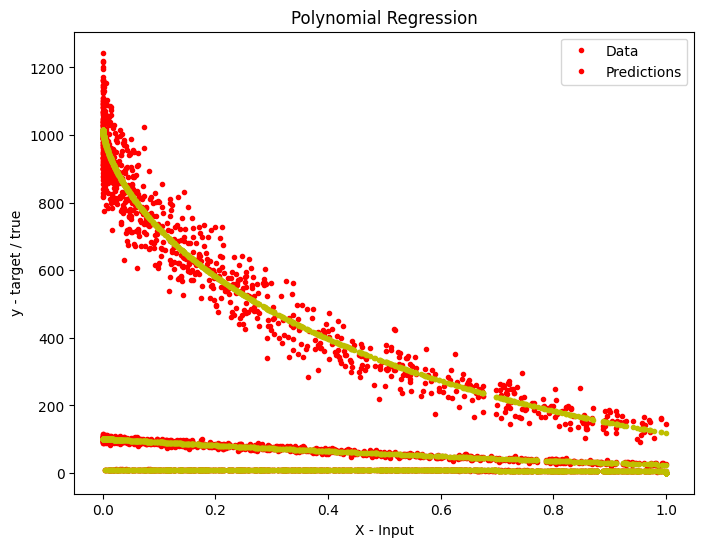

In [ ]:
## MARKER USE ONLY DO NOT MODIFY
y_pred_poly_all = lr_model_poly.predict(X_poly)

fig = plt.figure(figsize=(8,6))
plt.plot(X_poly, y_poly, 'r.')
plt.plot(X_poly, y_pred_poly_all, 'y.')
plt.legend(["Data", "Predictions"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Polynomial Regression')
plt.show()

## Experimenting with different degrees (1- 10)

R2:  0.954245576325796	Adj_r2:  0.9537810644103218


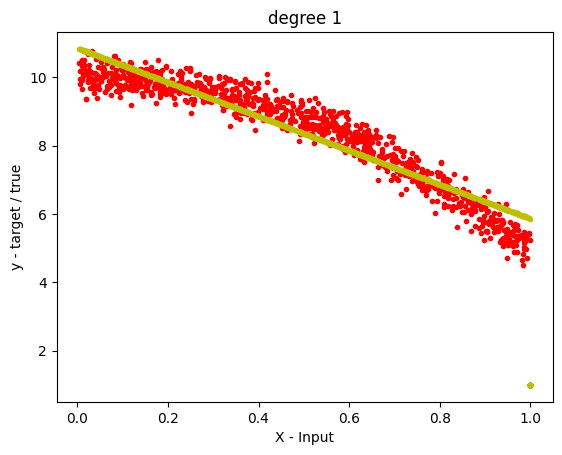

R2:  0.976695810438364	Adj_r2:  0.9763391136593593


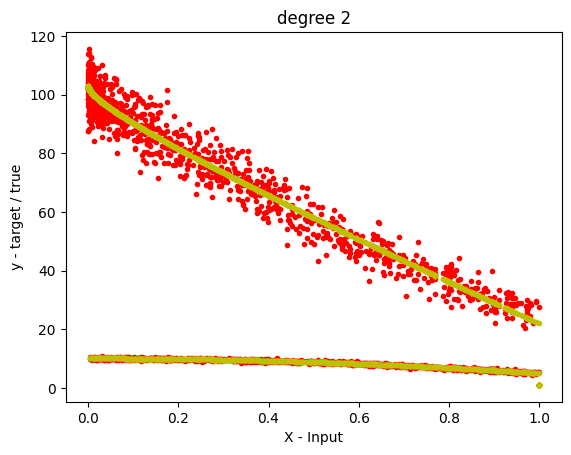

R2:  0.9710395243703347	Adj_r2:  0.9704454633317775


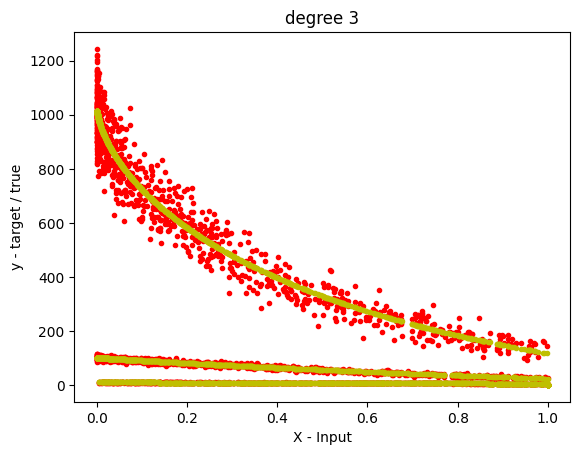

R2:  0.9656553170165301	Adj_r2:  0.964770144774688


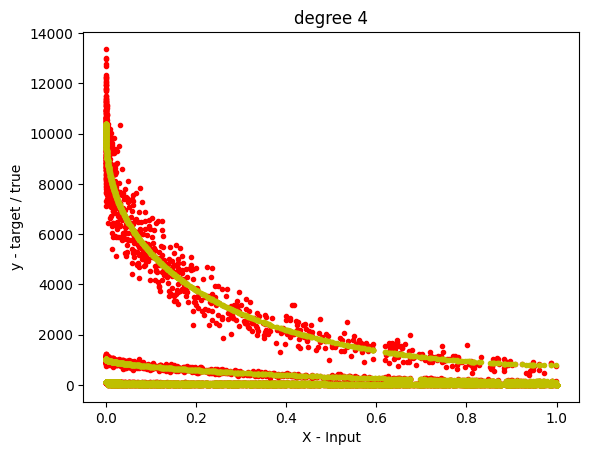

R2:  0.9601076784595594	Adj_r2:  0.9588675026603747


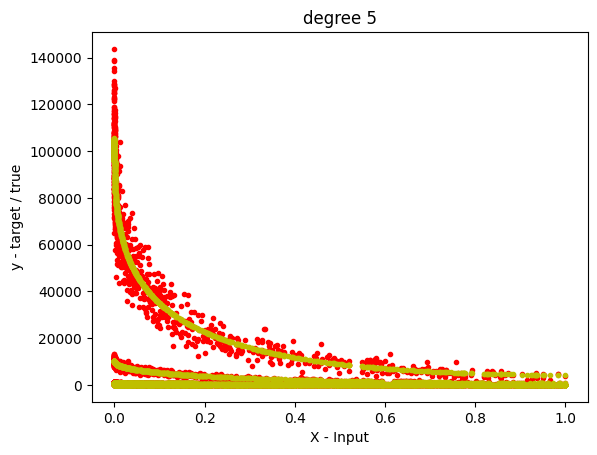

R2:  0.9531870948593121	Adj_r2:  0.9514803743593911


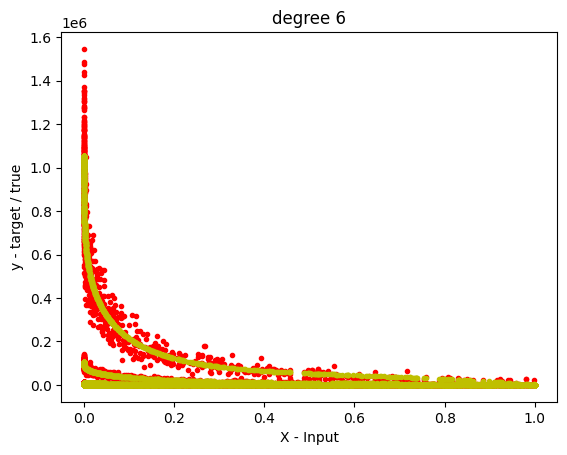

R2:  0.9461220646385582	Adj_r2:  0.9438653971888643


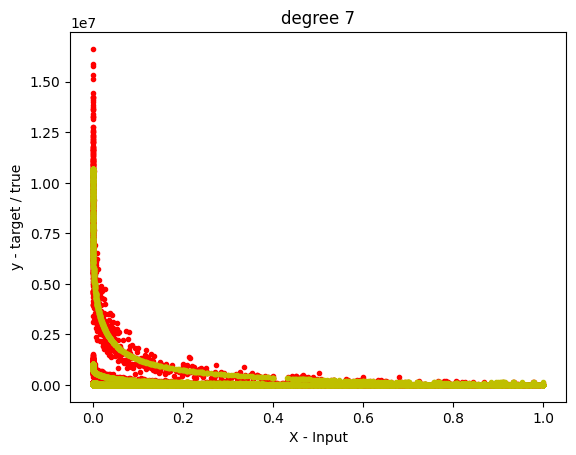

R2:  0.9387667586297064	Adj_r2:  0.9358662366700609


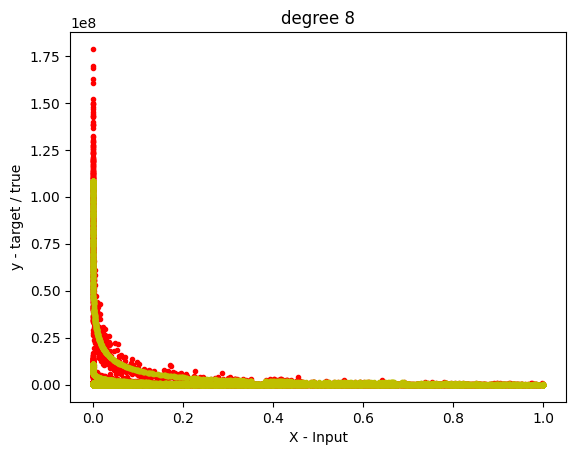

R2:  0.931299324490752	Adj_r2:  0.9276643681146013


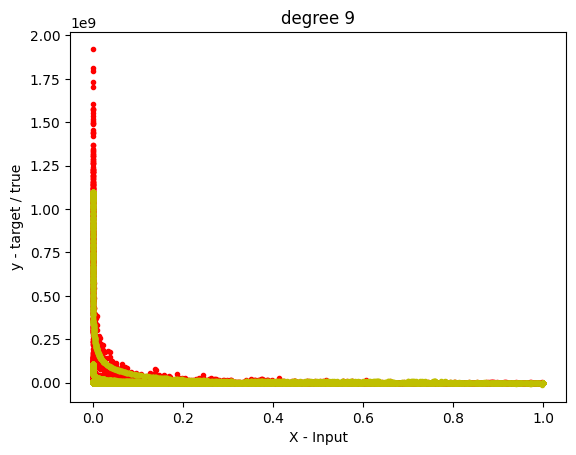

R2:  0.923210366437782	Adj_r2:  0.9187173559633969


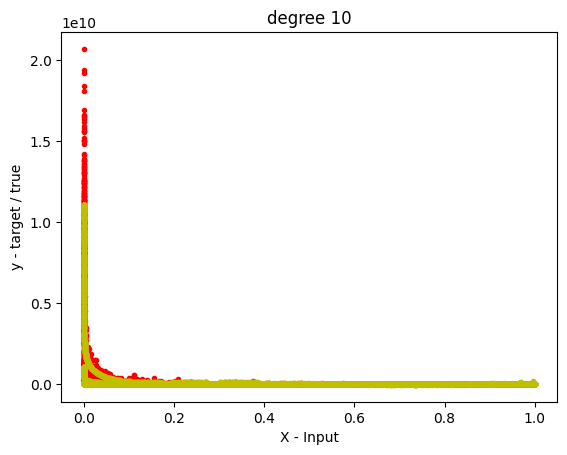

In [ ]:
for i in range(1, 11):
  polynomial_ = PolynomialFeatures(degree = i)
  X_poly = polynomial_.fit_transform(X)
  y_poly = polynomial_.fit_transform(y)
  X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size = 0.2, random_state = 0)

  lr_model_poly = LinearRegression()
  lr_model_poly.fit(X_train_poly, y_train_poly)
  y_pred_poly = lr_model_poly.predict(X_test_poly)
  r2 = r2_score(y_test_poly, y_pred_poly)
  print('R2: ', r2, end = '\t')

  n = X_test_poly.shape[0]
  p = X_test_poly.shape[1]
  adj_r2_poly = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
  print('Adj_r2: ', adj_r2_poly)

  y_pred_poly_all = lr_model_poly.predict(X_poly)


  plt.plot(X_poly, y_poly, 'r.')
  plt.plot(X_poly, y_pred_poly_all, 'y.')
  plt.xlabel('X - Input')
  plt.ylabel('y - target / true')
  plt.title(f'degree {i}')
  plt.show()